"Refatoração" para classe implementação baseada em https://github.com/zhaoyichanghong/machine_learing_algo_python/blob/master/gaussian_discriminant_analysis.py

# 1. Importações

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import pandas as pd 

# 2. Definição da classe do Análise Discriminante Gaussiano

In [ ]:
class GaussianDiscriminant():
  def __init__(self):
    pass

  def fitAGD(self, X, y):
    self.__classes = np.unique(y) # pegando as classes e ocorrencias
    numClasses = len(self.__classes) #numero de classes
    n, numFeatures = X.shape # numero de linhas e colunas do dataset 
    
    self.__sigma = 0
    self.__probabilidadeClasses = np.zeros((numClasses, 1))
    self.__media = np.zeros((numClasses, numFeatures)) # criando a lista da media das classes por feature

    for i in range(numClasses):
        # flatnonzero retorna os indices em que os valores são diferentes de zero. O retorno é uma lista flat. 
        # A comparação y == classes vai retornar um array de 0's e 1's. 
        # E portanto a operaçao final vai pegar todos os indices em que a classe é igual ao y.
        indices = np.flatnonzero(y == self.__classes[i])

        self.__probabilidadeClasses[i] = len(indices)/ n
        self.__media[i] = np.mean(X[indices], axis=0)
        self.__sigma += np.cov(X[indices].T) *(len(indices)-1)
        
    self.__sigma /= n
    
    return {'media': self.__media, 'covar': self.__sigma, 'classes': self.__classes, 'numRows': n, 'numClasses': numClasses, 
            'numFeatures': numFeatures, 'probabilidadeClasses': self.__probabilidadeClasses }

  def predict(self,X):
    # Usando a distribuição gaussiana multivariada da biblioteca scipy.stats
    # Basicamente o calculo da função densidade de probabilidade visto na imagem abaixo.
    pdf = lambda mean: multivariate_normal.pdf(X, mean=mean, cov=self.__sigma)

    # Apply a function to 1-D slices along the given axis
    # No caso aplica a função fdp no axis 1 das médias
    y_probs = np.apply_along_axis(pdf, 1, self.__media) * self.__probabilidadeClasses

    return self.__classes[np.argmax(y_probs, axis=0)]


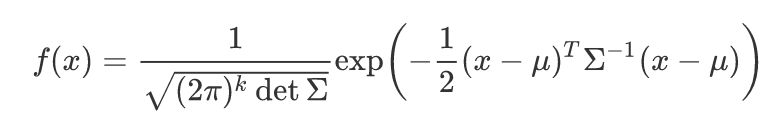

In [ ]:
# Uso
# agd = GaussianDiscriminant()
# agd.fitAGD(train, y_train)
# agd.predict(test)

# 3. Leitura dos dados

In [ ]:
data = pd.read_csv("ex2data1.txt", header = None)
print("Quantidade de padrões: ", len(data))
data.head()

Quantidade de padrões:  100


,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


# 4. Exemplo de uso

In [ ]:
train = data.iloc[0:70,0:2]
test = data.iloc[71: ,0:2]
y_train = data.iloc[0:70,2:]
y_test = data.iloc[71: , 2:]
y_train.shape
agd = GaussianDiscriminant()
fit = agd.fitAGD(train.to_numpy(), y_train)
agd.predict(test.to_numpy())

{'classes': array([0, 1]), 'covar': array([[ 243.98108958, -131.88494428],
        [-131.88494428,  262.97458216]]), 'media': array([[51.64651098, 55.32633024],
        [75.40506898, 72.74154596]]), 'numClasses': 2, 'numFeatures': 2, 'numRows': 70, 'probabilidadeClasses': array([[0.48571429],
        [0.51428571]])}